In [10]:
# 主要モジュール
import torch
import pandas as pd
# import numpy as np
import matplotlib.pyplot as plt

# 学習用のサンプルデータ
from sklearn import datasets

# データを整理する
from torch.utils.data import DataLoader

# 全結合層と活性化関数
from torch import nn
from torch.nn import functional as F

# 損失関数と最適化関数
from torch import optim
import pandas as pd

In [11]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"run with {device}")

run with cuda


In [12]:
# CSVファイルのパスを指定して読み込む
df = pd.read_csv('dataset_v1_1.csv', encoding='shift_jis')

In [13]:
df

,タイトル,日次,レース日,レース場,レース回,3連単_組番,3連単_払戻金,3連複_組番,3連複_払戻金,2連単_組番,...,全国3連率_6,当地勝率_6,当地2連率_6,当地3連率_6,モーター番号_6,モーター2連率_6,モーター3連率_6,モーター番号_6.1,モーター2連率_6.1,モーター3連率_6.1
0,ウルトラセブン杯,第7日,2022/1/1,大村,1R,1-5-3,5460,1-3-5,1130,1-5,...,46.15,4.63,26.490,43.05,73,21.15,27.88,74,36.94,53.15
1,ウルトラセブン杯,第7日,2022/1/1,大村,2R,2-1-6,12850,1-2-6,1780,2-1,...,49.44,5.57,39.710,52.21,31,27.05,44.26,22,24.53,42.45
2,ウルトラセブン杯,第7日,2022/1/1,大村,3R,1-2-3,870,1-2-3,470,1-2,...,4.93,1.71,0.005,0.88,15,25.00,37.50,69,37.93,53.45
3,ウルトラセブン杯,第7日,2022/1/1,大村,4R,1-3-4,1110,1-3-4,530,1-3,...,47.06,4.87,26.900,44.83,57,40.18,56.25,25,26.40,43.20
4,ウルトラセブン杯,第7日,2022/1/1,大村,5R,1-2-5,1220,1-2-5,790,1-2,...,54.21,6.19,41.090,63.37,39,33.90,48.31,28,24.78,42.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,第４８回日刊スポーツ栄光楯広島ダービー,第5日,2022/1/3,宮島,8R,1-5-3,2340,1-3-5,580,1-5,...,47.93,5.33,39.390,50.76,57,32.00,60.00,67,40.00,60.00
440,第４８回日刊スポーツ栄光楯広島ダービー,第5日,2022/1/3,宮島,9R,5-1-6,22820,1-5-6,4510,5-1,...,0.76,1.67,0.000,0.00,52,32.43,40.54,43,36.11,47.22
441,第４８回日刊スポーツ栄光楯広島ダービー,第5日,2022/1/3,宮島,10R,1-3-4,740,1-3-4,340,1-3,...,38.02,4.85,26.980,47.62,69,30.00,60.00,22,25.00,50.00
442,第４８回日刊スポーツ栄光楯広島ダービー,第5日,2022/1/3,宮島,11R,1-4-2,810,1-2-4,320,1-4,...,60.53,5.97,40.170,58.97,29,24.14,34.48,37,70.97,77.42


In [14]:
df = df.replace('.000.',0)
df = df.replace('.697.', 0.697)
df = df.replace('.139.', 0.139)
df = df.replace('-', 0.)

In [15]:
# 1.DataFrameを説明変数と目的変数に分ける
x = df[[
        "全国勝率_1",
        "当地勝率_1",
        "モーター2連率_1",
        "スタートタイム_1",
        "全国勝率_2",
        "当地勝率_2",
        "モーター2連率_2",
        "スタートタイム_2",
        "全国勝率_3",
        "当地勝率_3",
        "モーター2連率_3",
        "スタートタイム_3",
        "全国勝率_4",
        "当地勝率_4",
        "モーター2連率_4",
        "スタートタイム_4",
        "全国勝率_5",
        "当地勝率_5",
        "スタートタイム_5",
        "モーター2連率_5",
        "全国勝率_6",
        "当地勝率_6",
        "スタートタイム_6",
        "モーター2連率_6",
        ]]
t = df[["2連単_組番"]]

In [16]:
t

,2連単_組番
0,1-5
1,2-1
2,1-2
3,1-3
4,1-2
...,...
439,1-5
440,5-1
441,1-3
442,1-4


In [17]:
t = pd.get_dummies(df[["2連単_組番"]])

In [18]:
# 列名を取得する
headers = t.columns
print(headers)

Index(['2連単_組番_1-2', '2連単_組番_1-3', '2連単_組番_1-4', '2連単_組番_1-5', '2連単_組番_1-6',
       '2連単_組番_2-1', '2連単_組番_2-3', '2連単_組番_2-4', '2連単_組番_2-5', '2連単_組番_2-6',
       '2連単_組番_3-1', '2連単_組番_3-2', '2連単_組番_3-4', '2連単_組番_3-5', '2連単_組番_3-6',
       '2連単_組番_4-1', '2連単_組番_4-2', '2連単_組番_4-3', '2連単_組番_4-5', '2連単_組番_4-6',
       '2連単_組番_5-1', '2連単_組番_5-2', '2連単_組番_5-3', '2連単_組番_5-4', '2連単_組番_5-6',
       '2連単_組番_6-1', '2連単_組番_6-2', '2連単_組番_6-3', '2連単_組番_6-4', '2連単_組番_6-5'],
      dtype='object')


In [19]:
# 2.DataFrameをnarrayに変換
x = x.to_numpy().astype("float32")
t = t.to_numpy().astype("float32")

# 3.ndarrayをTensorに変換
x = torch.from_numpy(x).to(device)
t = torch.from_numpy(t).to(device)

# 4.TensorからDatasetを作成
dataset = torch.utils.data.TensorDataset(x, t)

# 5.学習用データとテスト用データに分ける
r = 0.9
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [r,1-r])

# 6.DataLoaderに変換
batch_size = 20
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=len(test_dataset), shuffle=False)

In [20]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()

        # 全結合層を6つに増やす
        self.fc1 = nn.Linear(24, 32)
        self.dropout1 = nn.Dropout(0.3)  # ドロップアウトを追加
        self.fc2 = nn.Linear(32, 64)
        self.dropout2 = nn.Dropout(0.3)  # ドロップアウトを追加
        self.fc3 = nn.Linear(64, 64)
        self.dropout3 = nn.Dropout(0.3)  # ドロップアウトを追加
        self.fc4 = nn.Linear(64, 64)
        self.dropout4 = nn.Dropout(0.3)  # ドロップアウトを追加
        self.fc5 = nn.Linear(64, 32)
        self.dropout5 = nn.Dropout(0.3)  # ドロップアウトを追加
        self.fc6 = nn.Linear(32, 30)

        # 損失関数と最適化関数
        self.criterion = nn.CrossEntropyLoss()
        self.criterion_2 = nn.HingeEmbeddingLoss()
        self.optimizer = optim.Adam(self.parameters())

    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout1(x)  # ドロップアウトを適用
        x = self.fc2(x)
        x = F.relu(x)
        x = self.dropout2(x)  # ドロップアウトを適用
        x = self.fc3(x)
        x = F.relu(x)
        x = self.dropout3(x)  # ドロップアウトを適用
        x = self.fc4(x)
        x = F.relu(x)
        x = self.dropout4(x)  # ドロップアウトを適用
        x = self.fc5(x)
        x = F.relu(x)
        x = self.dropout5(x)  # ドロップアウトを適用
        x = self.fc6(x)
        return x

In [21]:
def train(model, data_loader):
    # 今は学習時であることを明示するコード
    model.train()

    # 正しい予測数、全体のデータ数を数えるカウンターの0初期化
    total_correct = 0
    total_data_len = 0

    loss_mean = 0

    # ミニバッチごとにループさせる,train_loaderの中身を出し切ったら1エポックとなる
    for j, (x, t) in enumerate(data_loader):
        y = model(x)  # 順伝播

        model.optimizer.zero_grad()  # 勾配を初期化（前回のループ時の勾配を削除）
        loss = model.criterion(y, t) + (model.criterion_2(y, t))/5# 損失を計算
        loss.backward()  # 逆伝播で勾配を計算
        model.optimizer.step()  # 最適化

        loss_mean += loss.item()

        # ミニバッチごとの正答率と損失を求める
        _, index_y = torch.max(y, axis=1)  # 最も確率が高いと予測したindex
        _, index_t = torch.max(t, axis=1)  # 正解のindex
        for i in range(len(t)):  # データ一つずつループ,ミニバッチの中身出しきるまで
            total_data_len += 1  # 全データ数を集計
            if index_y[i] == index_t[i]:
                total_correct += 1 # 正解のデータ数を集計

    loss_mean = loss_mean / (j+1)

    return total_correct, total_data_len, loss_mean


In [22]:
def test(model, data_loader):
    # モデルを評価モードにする
    model.eval()

    # 正しい予測数、全体のデータ数を数えるカウンターの0初期化
    total_data_len = 0
    total_correct = 0

    loss_mean = 0

    for j, (x, t) in enumerate(data_loader):
        y = model(x)  # 順伝播（=予測）
        loss = model.criterion(y, t)  # 損失を計算
        loss_mean += loss.item()

        # ミニバッチごとの正答率と損失を求める
        _, index_y = torch.max(y, axis=1)  # 最も確率が高いと予測したindex
        _, index_t = torch.max(t, axis=1)  # 正解のindex
        for i in range(len(t)):  # データ一つずつループ,ミニバッチの中身出しきるまで
            total_data_len += 1  # 全データ数を集計
            if index_y[i] == index_t[i]:
                total_correct += 1 # 正解のデータ数を集計

    loss_mean = loss_mean / (j+1)

    return total_correct, total_data_len, loss_mean


In [23]:
# アーキテクチャのインスタンス作成
model = Net().to(device)

epochs = 40
record_train_loss = []
record_test_loss = []
for epoch in range(epochs):
    train_correct_len, train_data_len, train_loss = train(model, train_loader)
    test_correct_len, test_data_len, test_loss = test(model, test_loader)

    train_acc = train_correct_len/train_data_len*100
    test_acc = test_correct_len/test_data_len*100

    record_train_loss.append(train_loss)
    record_test_loss.append(test_loss)

    if epoch%10 == 0:
        print(f"epoch={epoch}, train:{train_correct_len}/{train_data_len}({train_acc:.2f}%), {train_loss:.5f}, test:{test_correct_len}/{test_data_len}({test_acc:.2f}%), {test_loss:.5f}")


epoch=0, train:9/400(2.25%), 3.68015, test:2/44(4.55%), 3.39646
epoch=10, train:58/400(14.50%), 3.15792, test:8/44(18.18%), 2.98672
epoch=20, train:60/400(15.00%), 3.12341, test:8/44(18.18%), 2.98134
epoch=30, train:73/400(18.25%), 3.07554, test:8/44(18.18%), 2.93893


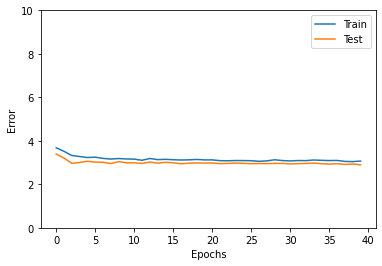

In [24]:
plt.plot(range(len(record_train_loss)), record_train_loss, label="Train")
plt.plot(range(len(record_test_loss)), record_test_loss, label="Test")
plt.legend()

plt.ylim(0,10)
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.show()

In [ ]:
test_dataset[0][0]
test_dataset[0][1]

tensor([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], device='cuda:0')

In [ ]:
import csv

In [ ]:
csv_path = "pread_AI.csv"
headers = ','.join(t.columns.to_list())
with open(csv_path, "w", encoding="utf_8") as csv_file:
    csv_file.write(headers + '\n')

for data_raw in dataset:
    data = torch.Tensor(data_raw[0]).to(device)
    pred = model(data)
    pred = F.softmax(pred, dim=0)
    pred_list = pred.tolist()

    with open(csv_path, 'a') as file:
        writer = csv.writer(file)
        writer.writerow(pred_list)

In [ ]:
pred

tensor([0.1814, 0.1294, 0.1325, 0.0676, 0.0469, 0.0706, 0.0253, 0.0242, 0.0118,
        0.0141, 0.0542, 0.0206, 0.0267, 0.0120, 0.0116, 0.0313, 0.0111, 0.0128,
        0.0110, 0.0158, 0.0210, 0.0071, 0.0068, 0.0044, 0.0074, 0.0263, 0.0032,
        0.0022, 0.0040, 0.0069], device='cuda:0', grad_fn=<SoftmaxBackward0>)

In [ ]:
data = torch.Tensor(test_dataset[23][0]).to(device)
pred = model(data)
pred = F.softmax(pred,dim=0)

In [ ]:
pred

tensor([0.0998, 0.0865, 0.0766, 0.0552, 0.0449, 0.0607, 0.0346, 0.0281, 0.0228,
        0.0239, 0.0526, 0.0304, 0.0303, 0.0209, 0.0230, 0.0382, 0.0221, 0.0248,
        0.0216, 0.0242, 0.0291, 0.0174, 0.0171, 0.0120, 0.0177, 0.0327, 0.0114,
        0.0105, 0.0134, 0.0174], device='cuda:0', grad_fn=<SoftmaxBackward0>)

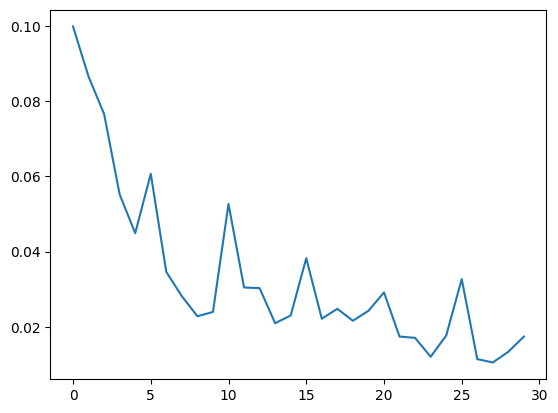

In [ ]:
ls1 = pred.tolist()
plt.plot(ls1)
plt.show()

In [ ]:
plt.xlim(0,5)plt.xlim(0,5)

SyntaxError: ignored

# 以下、XBNETの試行錯誤

In [ ]:
data = torch.Tensor([5.1,3.5,1.4,0.2]).to(device)
pred = model(data)
pred = F.softmax(pred,dim=0)

for target,probability in zip(pd.unique(df["target"]),pred):
    print(f"{target} : {probability.item():.5f}")


setosa : 0.99995
versicolor : 0.00005
virginica : 0.00000


In [ ]:
pip install --upgrade git+https://github.com/tusharsarkar3/XBNet.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/tusharsarkar3/XBNet.git to /tmp/pip-req-build-nz2txk55
  Running command git clone --filter=blob:none --quiet https://github.com/tusharsarkar3/XBNet.git /tmp/pip-req-build-nz2txk55
  Resolved https://github.com/tusharsarkar3/XBNet.git to commit 2b771d6beb9f15ae48e2a365f46d6f996811086f
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 32.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 106.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.9/37.9 MB 13.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of xbnet to determine which version is compatible with other requirements. This could take a while.
ERROR: Could not find a version that satisfies the requirement torch==1.9.0 (f

In [ ]:
# Pytorch 1.9.0をインストール
!pip uninstall torch -y
!pip install torch==1.9.0+cu111 torchvision==0.10.0+cu111 torchaudio==0.9.0 -f https://download.pytorch.org/whl/torch_stable.html
!pip install einops timm moviepy

# インストールしたPytorchの動作確認(バージョン、CUDAの認識可否、GPU数確認)
import torch
!python -c "import torch; print(torch.__version__); print(torch.cuda.is_available()); print(torch.cuda.device_count());"

Found existing installation: torch 2.0.1+cu118
Uninstalling torch-2.0.1+cu118:
  Successfully uninstalled torch-2.0.1+cu118
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html
ERROR: Could not find a version that satisfies the requirement torch==1.9.0+cu111 (from versions: 1.11.0, 1.11.0+cpu, 1.11.0+cu102, 1.11.0+cu113, 1.11.0+cu115, 1.11.0+rocm4.3.1, 1.11.0+rocm4.5.2, 1.12.0, 1.12.0+cpu, 1.12.0+cu102, 1.12.0+cu113, 1.12.0+cu116, 1.12.0+rocm5.0, 1.12.0+rocm5.1.1, 1.12.1, 1.12.1+cpu, 1.12.1+cu102, 1.12.1+cu113, 1.12.1+cu116, 1.12.1+rocm5.0, 1.12.1+rocm5.1.1, 1.13.0, 1.13.0+cpu, 1.13.0+cu116, 1.13.0+cu117, 1.13.0+cu117.with.pypi.cudnn, 1.13.0+rocm5.1.1, 1.13.0+rocm5.2, 1.13.1, 1.13.1+cpu, 1.13.1+cu116, 1.13.1+cu117, 1.13.1+cu117.with.pypi.cudnn, 1.13.1+rocm5.1.1, 1.13.1+rocm5.2, 2.0.0, 2.0.0+cpu, 2.0.0+cpu.cxx11.abi, 2.0.0+cu117, 2.0.0+cu117.with.pypi.cudnn, 2.0.0+cu118, 2.

2.0.1+cu117
True
1


In [ ]:
pip install --upgrade git+https://github.com/tusharsarkar3/XBNet.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/tusharsarkar3/XBNet.git to /tmp/pip-req-build-7nsglnl5
  Running command git clone --filter=blob:none --quiet https://github.com/tusharsarkar3/XBNet.git /tmp/pip-req-build-7nsglnl5
  Resolved https://github.com/tusharsarkar3/XBNet.git to commit 2b771d6beb9f15ae48e2a365f46d6f996811086f
  Preparing metadata (setup.py) ... done
  Using cached sklearn-0.0.tar.gz (1.1 kB)
  Preparing metadata (setup.py) ... done
  Using cached numpy-1.22.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.8 MB)
  Using cached pandas-1.3.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.5 MB)
  Using cached matplotlib-3.4.3.tar.gz (37.9 MB)
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of xbnet to determine which version is compatible with other requirements. This could take a while.
ERROR: Could not find a version tha

In [ ]:
!pip install --upgrade pip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install torch==1.9.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement torch==1.9.0 (from versions: 1.11.0, 1.12.0, 1.12.1, 1.13.0, 1.13.1, 2.0.0, 2.0.1)
ERROR: No matching distribution found for torch==1.9.0


In [ ]:
!git clone https://github.com/tusharsarkar3/XBNet.git

Cloning into 'XBNet'...
remote: Enumerating objects: 342, done.
remote: Counting objects: 100% (60/60), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 342 (delta 25), reused 46 (delta 23), pack-reused 282
Receiving objects: 100% (342/342), 9.73 MiB | 8.21 MiB/s, done.
Resolving deltas: 100% (160/160), done.


In [ ]:
cd XBNet

/content/XBNet


In [ ]:
pip install .

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/XBNet
  Preparing metadata (setup.py) ... done
  Using cached sklearn-0.0.tar.gz (1.1 kB)
  Preparing metadata (setup.py) ... done
  Using cached numpy-1.22.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.8 MB)
  Using cached pandas-1.3.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.5 MB)
  Using cached matplotlib-3.4.3.tar.gz (37.9 MB)
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.6/750.6 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.7/166.7 MB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.2/76.2 kB 10.8 MB/s eta 0:00:00
  Created wheel for XBNet: filename=XBNet-1.4.6-py3-none-any.whl size=12345 sha256=95447ac64ff0b1dd896d35db4868dad664da96d1a2b992d9f47e165f94c21713
  Stored in directory: /tmp/pip-ephem-wheel-cache-thjdm2xf/wheels/96/4c/2e/

In [ ]:
import torch
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from XBNet.training_utils import training,predict
from XBNet.models import XBNETClassifier
from XBNet.run import run_XBNET

In [ ]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# targetというカラムに目的変数となる名前を入れる
df['target'] = iris.target_names[iris.target]

In [ ]:
data = df
print(data.shape)
x_data = data[data.columns[:-1]]
print(x_data.shape)
y_data = data[data.columns[-1]]
le = LabelEncoder()
y_data = np.array(le.fit_transform(y_data))
print(le.classes_)

(150, 5)
(150, 4)
['setosa' 'versicolor' 'virginica']
Enter dimensions of linear layers: 
Enter input dimensions of layer 1: 4
Enter output dimensions of layer 1: 4
Set bias as True or False: 4
Enter input dimensions of layer 2: 4
Enter output dimensions of layer 2: 4
Set bias as True or False: 4
Enter your last layer 
1. Sigmoid 
2. Softmax 
3. None 
4


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(x_data.to_numpy(),y_data,test_size = 0.3,random_state = 0)

In [ ]:
model = XBNETClassifier(X_train,y_train,2)

Enter dimensions of linear layers: 


KeyboardInterrupt: ignored

In [ ]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [ ]:
m,acc, lo, val_ac, val_lo = run_XBNET(X_train,X_test,y_train,y_test,model,criterion,optimizer,32,300)
print(predict(m,x_data.to_numpy()[0,:]))

Percentage training completed:   0%|          | 0/300 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
Percentage training completed:   0%|          | 0/300 [00:00<?, ?it/s]


TypeError: ignored